<b>Of both the Haar Cascade Technique and the Multi-task Cascaded Convolutional Networks (MTCNN),</b>
<b>MTCNN performed better.</b>
<b>Please see codes and comparison below.</b>

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

face_cascade = cv2.CascadeClassifier('./Gender_Classifier/haarcascade_frontalface_default.xml')
PATH = './Gender_Classifier/Gender_Classification_Images/faces/Enhanced_Images/train/'
men_images=(cv2.imread(file) for file in glob.glob(PATH + 'man/*.jpg'))
women_images=(cv2.imread(file) for file in glob.glob(PATH + 'woman/*.jpg'))



def cascade(image):
    """
    Implement the cascade function that uses the haar casacade to detect faces in images.
    
    Argument:
    image -- A numpy matrix of shape (m, n, 3).
    
    Returns:
    col_img -- the image with the face detected.
    """
    # converts color to grayscale as haar cascade only works with grayscale    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply detectMultiScale method in haar cascade to obtain faces in images    
    faces = face_cascade.detectMultiScale(gray, 1.2, 4)
    
    # loop over facial dimensions and draw rectangle on faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    col_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return plt.imshow(col_img)


def cascade_save(generator, gender):
    """
    Implement the cascade_save function to save cropped faces from faces detected by haar cascade.
    
    Argument:
    generator -- an object of type generator that generates input images of shape (m, n, 3)
    """
    try:
        n = 0   
        for img in generator:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.1, 4)

            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 0)
                faces = img[y:y + h, x:x + w]   #acts as the face cropper

                if gender == 'male':
                    cv2.imwrite(PATH + f'cropped_man/man_{n}.jpg', faces)

                elif gender == 'female':
                    cv2.imwrite(PATH + f'cropped_woman/woman_{n}.jpg', faces)

                else:
                    break        
                n+=1               
            break
            
    except TypeError:
        print('TypeError: Make sure argument generator is an image generator and the gender is "male" or "female".')
        
        
def mtcnn(filename):
    """
    Implement the mtcnn function that uses the MTCNN to detect faces in images.
    
    Argument:
    filename -- A numpy matrix of shape (m, n, 3).
    
    Returns:
    the image with the face detected.
    """
    #     assigning the MTCNN constructor to detector
    detector = MTCNN()
    image = cv2.cvtColor(filename, cv2.COLOR_BGR2RGB)
    
    #     Obtain facial features
    faces = detector.detect_faces(image)
    print(image.shape)
    plt.imshow(image)
    ax = plt.gca()
    
    # loop over facial dimensions and draw rectangle on faces
    for result in faces:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()


def mtcnn_save(generator, gender):
    """
    Function to save the cropped faces from the images, if the desired face detector is MTCNN.
    """   
    try:
        n = 0
        detector = MTCNN()
        for img in generator:
            pic = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(pic)

            for i in range(len(faces)):
                x1, y1, width, height = faces[i]['box']
                x2, y2 = x1 + width, y1 + height
                x = pic[y1:y2, x1:x2] #acts as the cropper
                cropped = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

                if gender == 'male':
                    cv2.imwrite(PATH + f'cropped_man/man_{n}.jpg', cropped)

                elif gender == 'female':
                    cv2.imwrite(PATH + f'cropped_woman/woman_{n}.jpg', cropped)

                else:
                    break
                n+=1   
            break
            
    except TypeError:
        print('TypeError: Make sure argument generator is an image generator and the gender is "male" or "female".')

In [20]:
mtcnn_save(1, 'a')

TypeError: Make sure argument generator is an image generator and the gender is "male" or "female".


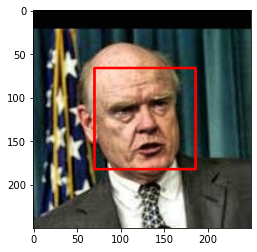

In [4]:
cascade(next(men_images))

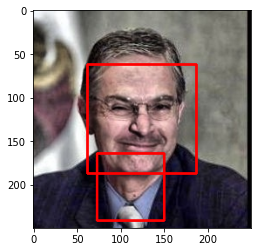

In [17]:
cascade(next(men_images))

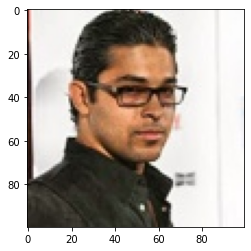

In [33]:
cascade(next(men_images))

(250, 250, 3)


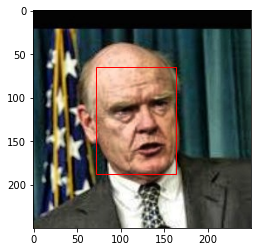

In [12]:
mtcnn(next(men_images))

(250, 250, 3)


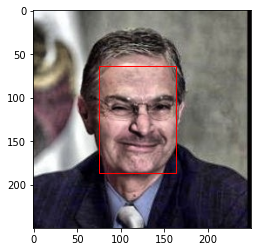

In [25]:
mtcnn(next(men_images))

(100, 100, 3)


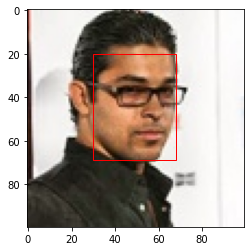

In [41]:
mtcnn(next(men_images))

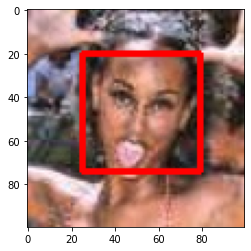

In [8]:
cascade(next(women_images))

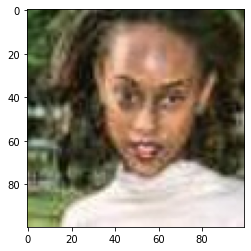

In [7]:
cascade(next(women_images))

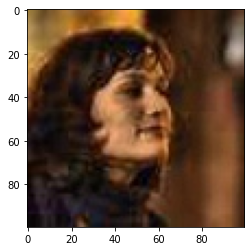

In [28]:
cascade(next(women_images))

(100, 100, 3)


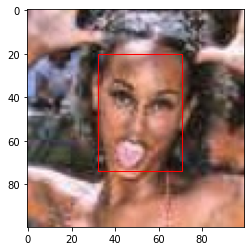

In [7]:
mtcnn(next(women_images))

(100, 100, 3)


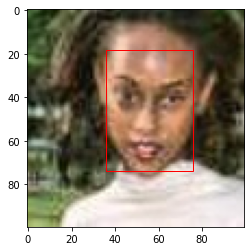

In [6]:
mtcnn(next(women_images))

(100, 100, 3)


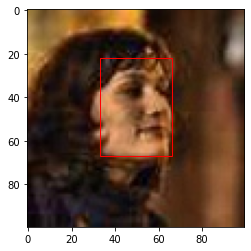

In [27]:
mtcnn(next(women_images))

In [ ]:
# cascade_save(men_images, 'male')

In [ ]:
# mtcnn_save(men_images, 'male')